In [1]:
from torch_loader import *

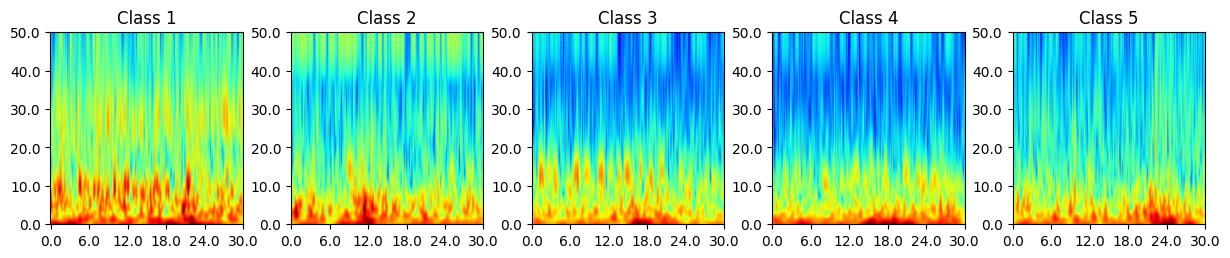

In [46]:
plt.rcParams['figure.figsize'] = [15, 2.5]  # Adjust the size as needed

class_examples = {}
found_classes = set()

for images, labels in subset_dataloader:
    for i in range(len(labels)):
        label = labels[i].item()  # Extract label
        if label not in found_classes and 0 <= label <= 4:
            class_examples[label] = images[i]  # Store the image
            found_classes.add(label)
        if len(found_classes) == 5:
            break
    if len(found_classes) == 5:
        break

for i, (label, image) in enumerate(sorted(class_examples.items()), 1):
    plt.subplot(1, 5, i)
    plt.imshow(np.swapaxes(np.swapaxes(image, 0, 2), 0, 1))
    plt.title(f'Class {label + 1}')
    x_ticks = np.linspace(0, image.shape[1], num=6)
    x_labels = np.linspace(0, 30, num=6)
    y_ticks = np.linspace(0, image.shape[2], num=6)  
    y_labels = np.linspace(50, 0, num=6)

    plt.xticks(x_ticks, x_labels)
    plt.yticks(y_ticks, y_labels)
plt.show()

In [2]:
x_train = np.asarray(x_train.view(x_train.size(0), -1))
x_test = np.asarray(x_test.view(x_test.size(0), -1))
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train.shape)
print(x_test.shape)

(362, 150528)
(91, 150528)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................degree=3, gamma=100, kernel=poly; total time=  45.6s
[CV] END ...................degree=3, gamma=100, kernel=poly; total time=  43.6s
[CV] END ...................degree=3, gamma=100, kernel=poly; total time=  45.4s
[CV] END ...................degree=3, gamma=100, kernel=poly; total time=  45.3s
[CV] END ...................degree=3, gamma=100, kernel=poly; total time=  44.3s
[CV] END ...................degree=4, gamma=0.1, kernel=poly; total time=  44.4s
[CV] END ...................degree=4, gamma=0.1, kernel=poly; total time=  43.9s
[CV] END ...................degree=4, gamma=0.1, kernel=poly; total time=  46.2s
[CV] END ...................degree=4, gamma=0.1, kernel=poly; total time=  46.0s
[CV] END ...................degree=4, gamma=0.1, kernel=poly; total time=  44.7s
[CV] END ..................degree=2, gamma=0.01, kernel=poly; total time=  44.6s
[CV] END ..................degree=2, gamma=0.01, 

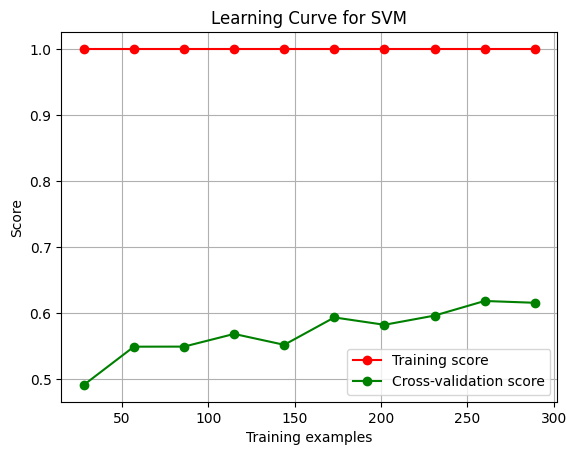

In [3]:
model = SVC(probability=True, decision_function_shape='ovr')

param_distributions = { 'gamma': [0.01, 0.1, 1, 10, 100],
                        'degree': [2, 3, 4],
                        'kernel': ['poly']}

rnd_search = RandomizedSearchCV(model, param_distributions, n_iter=5, cv=5, verbose=2, random_state=42)
rnd_search.fit(x_train, y_train)

best_model = rnd_search.best_estimator_
print("Best model parameters:")
print(best_model.get_params())

# Evaluate the final model
y_pred = best_model.predict(x_test)
print(f"The model is {accuracy_score(y_test, y_pred) * 100}% accurate")

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve for SVM")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [20]:
y_test = np.asarray(y_test)
errors = y_pred - y_test
nn = 1 - accuracy_score(y_test, y_pred)
std_dev = np.std(errors)  # Standard deviation of the prediction errors
n = len(errors)  # Number of observations
sem = std_dev / np.sqrt(n)  # Standard Error of the Mean 
semsem = nn / np.sqrt(len(y_test))
semsem_p = (semsem / 1) * 100
sem_percentage = (sem / 1) * 100

print("Standard Error of the Mean (SEM):", semsem_p)

Standard Error of the Mean (SEM): 3.6862763489122403


In [21]:

print(classification_report(y_test, y_pred, target_names=['sleep stage W', 'sleep Stage 1', 'sleep Stage 2', 'Sleep Stage 3/4', 'Sleep Stage R']))

                 precision    recall  f1-score   support

  sleep stage W       0.71      0.85      0.77        20
  sleep Stage 1       0.44      0.35      0.39        20
  sleep Stage 2       0.71      0.60      0.65        20
Sleep Stage 3/4       0.90      0.82      0.86        11
  Sleep Stage R       0.58      0.70      0.64        20

       accuracy                           0.65        91
      macro avg       0.67      0.66      0.66        91
   weighted avg       0.64      0.65      0.64        91



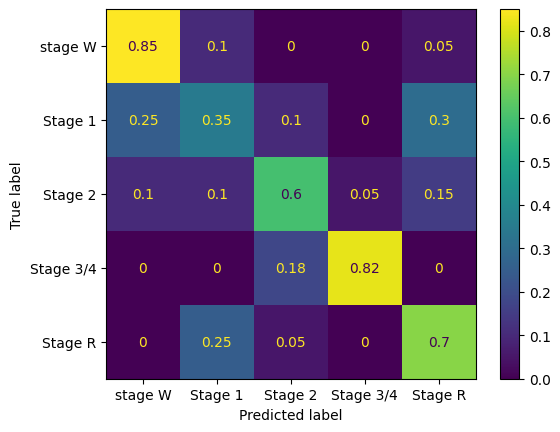

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4], normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["stage W", "Stage 1", "Stage 2", "Stage 3/4", "Stage R"])
disp.plot()
plt.show()